In [1]:
import geopandas as gpd
import osmnx as ox

<Axes: >

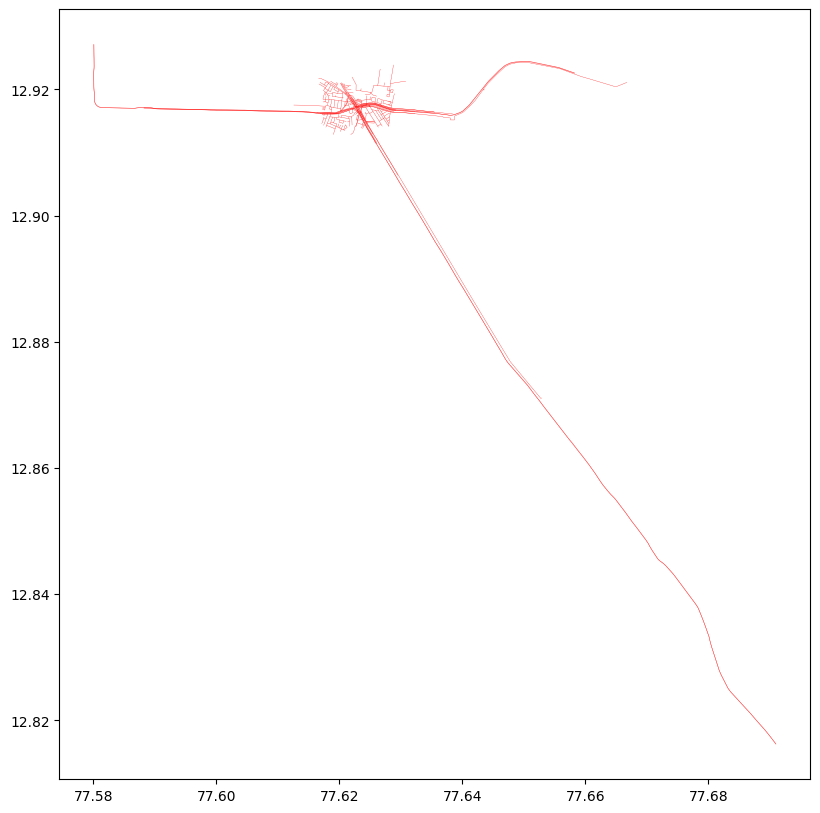

In [2]:
roads = gpd.read_file("map.osm", layer="lines")
roads.plot(figsize=(20,10), color="red", linewidth=0.2)


In [70]:
roads.head()

osm_id               name      highway waterway aerialway barrier  \
0  27555707    Outer Ring Road        trunk     None      None    None   
1  27934861      1st Main Road  residential     None      None    None   
2  27934864               None  residential     None      None    None   
3  27934930  14th B Cross Road  residential     None      None    None   
4  27934960    1st C Main Road  residential     None      None    None   

  man_made railway  z_order  \
0     None    None        8   
1     None    None        3   
2     None    None        3   
3     None    None        3   
4     None    None        3   

                                          other_tags  \
0  "lanes"=>"3","maxspeed"=>"40","name:kn"=>"ಹೊರ ...   
1  "lanes"=>"2","name:kn"=>"೧ನೇ ಮುಖ್ಯ ರಸ್ತೆ","sur...   
2                                               None   
3                     "name:kn"=>"೧೪ನೇ ಬಿ ಅಡ್ಡರಸ್ತೆ"   
4                    "name:kn"=>"೧ನೇ ಸೀ ಮುಖ್ನ ರಸ್ತೆ"   

                                            geometry  
0    LINESTRING (77.6226 12.9173, 77.62283 12.91737)  
1  LINESTRING (77.62427 12.91718, 77.62468 12.916...  
2  LINESTRING (77.62622 12.91418, 77.62675 12.91451)  
3  LINESTRING (77.62491 12.91616, 77.62547 12.91651)  
4  LINESTRING (77.62617 12.91706, 77.62638 12.916...

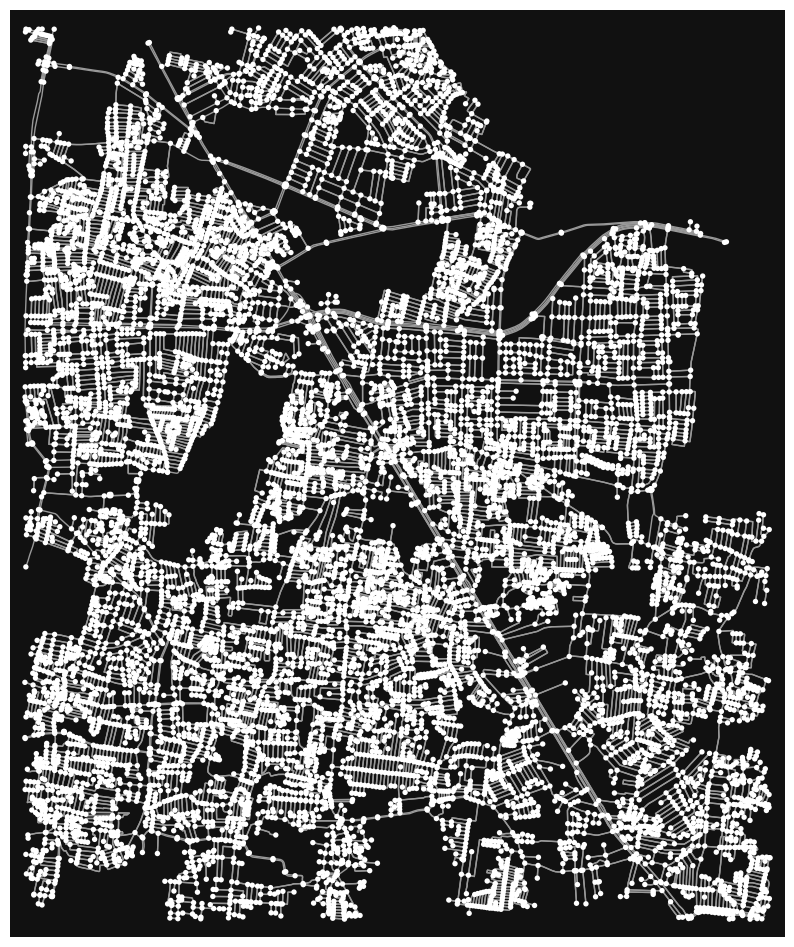

In [3]:
import matplotlib.pyplot as plt
# lbrt
G = ox.graph_from_bbox([77.60,12.87,77.66,12.94],network_type='drive')
fig, ax = ox.plot_graph(G, figsize=(10,30), edge_linewidth=1)

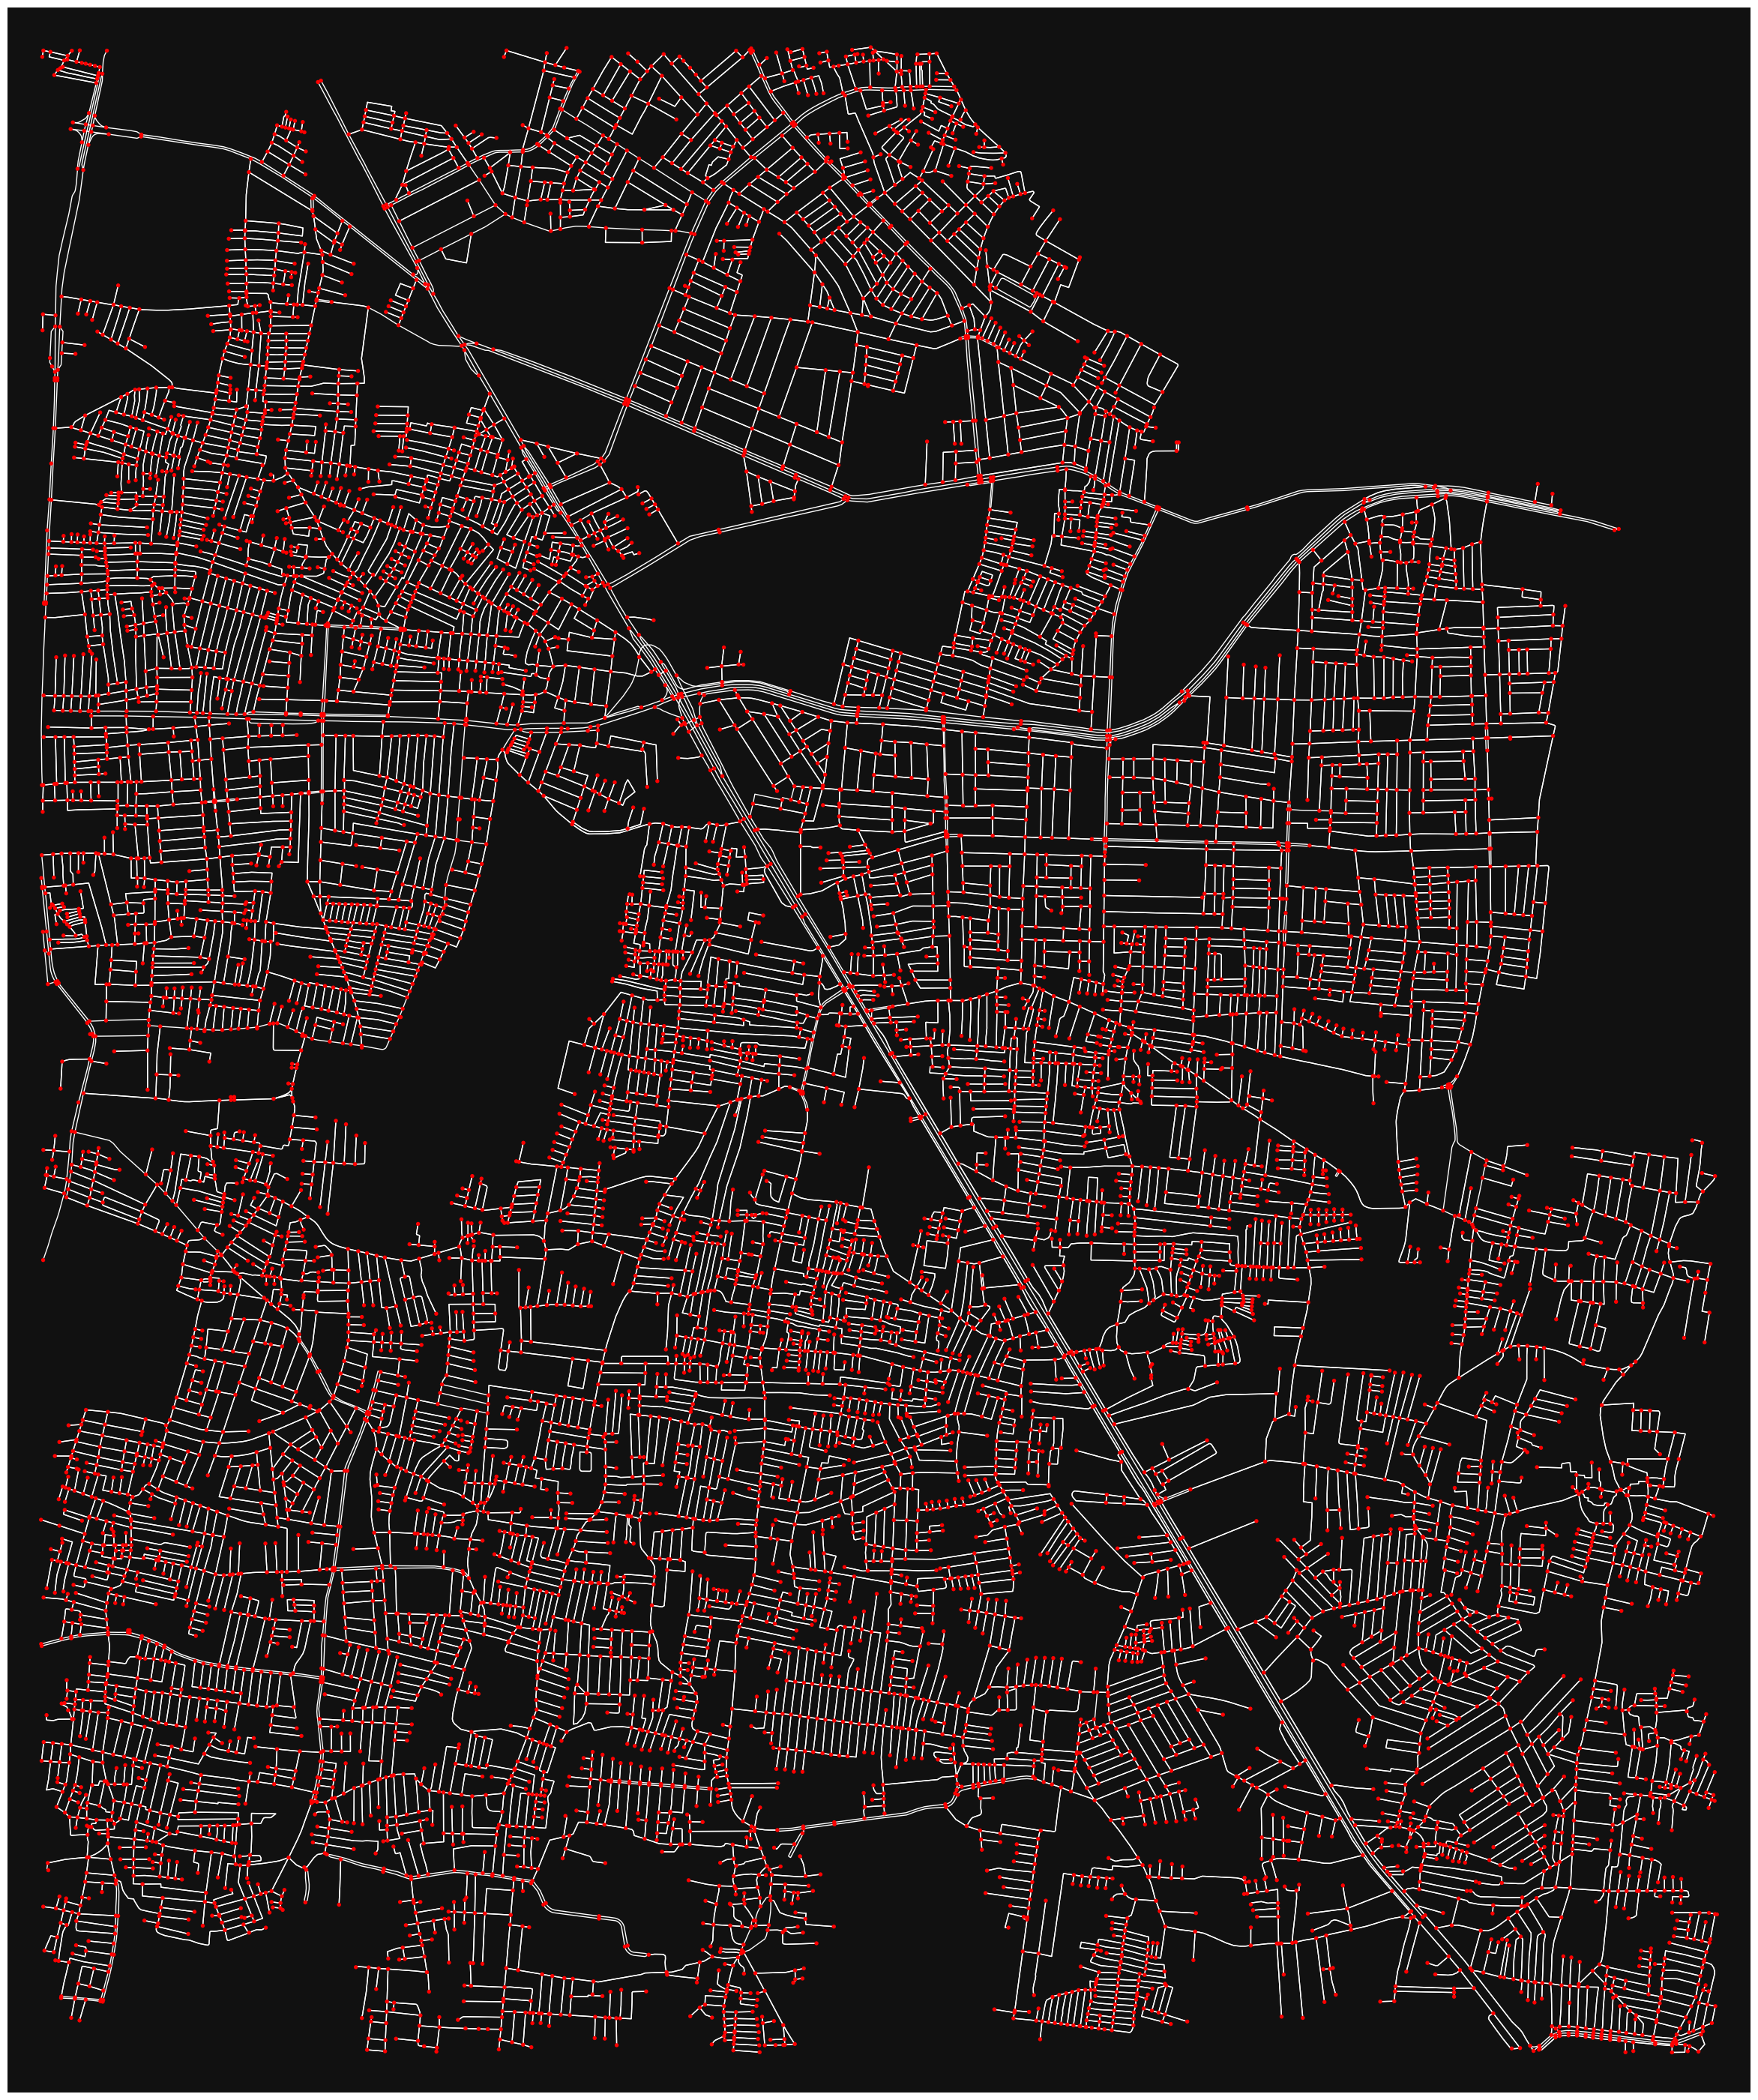

(<Figure size 3000x4000 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(G, figsize=(30, 40), node_color="red", edge_color="white")

In [5]:
nodes,edges=ox.graph_to_gdfs(G)

In [6]:
nodes.head()

y          x  street_count highway  \
osmid                                                   
17327139   12.934965  77.624072             3     NaN   
17327141   12.938493  77.629168             3     NaN   
245613696  12.924564  77.617992             3     NaN   
247852770  12.896237  77.608092             3     NaN   
247852771  12.897042  77.607138             3     NaN   

                            geometry  
osmid                                 
17327139   POINT (77.62407 12.93497)  
17327141   POINT (77.62917 12.93849)  
245613696  POINT (77.61799 12.92456)  
247852770  POINT (77.60809 12.89624)  
247852771  POINT (77.60714 12.89704)

In [7]:
nodes['highway'].value_counts()

highway
traffic_signals      21
motorway_junction     1
crossing              1
bus_stop              1
Name: count, dtype: int64

In [8]:
nodes['street_count'].value_counts()

street_count
3    7455
1    3006
4    1321
5      12
2       9
Name: count, dtype: int64

In [13]:
edges.columns

Index(['osmid', 'highway', 'lanes', 'name', 'oneway', 'reversed', 'length',
       'geometry', 'maxspeed', 'access', 'ref', 'width', 'est_width', 'bridge',
       'tunnel', 'junction'],
      dtype='object')

In [14]:
edges['bridge'].value_counts()

bridge
yes    89
Name: count, dtype: int64

In [15]:
edges['name'].value_counts()


name
1st Main Road                                       316
1st Cross Road                                      314
7th Cross Road                                      285
5th Cross Road                                      264
3rd Cross Road                                      240
                                                   ... 
[1st Avenue, 1st Main Road]                           1
[Bannerghatta Road, Jayadeva Hospital Underpass]      1
100 feet Road                                         1
[Sarjapura Road, Sarjapur Road]                       1
39 Cross Road                                         1
Name: count, Length: 375, dtype: int64

In [16]:
edges['highway'].value_counts()

highway
residential                     24079
tertiary                         3204
secondary                        1166
living_street                     246
primary                           225
trunk                             149
tertiary_link                      63
trunk_link                         58
unclassified                       38
primary_link                       34
secondary_link                     29
[residential, living_street]       14
[residential, tertiary]             2
[primary, primary_link]             2
[trunk, primary]                    1
busway                              1
Name: count, dtype: int64

viz roads point of interests and other stuff

<Axes: >

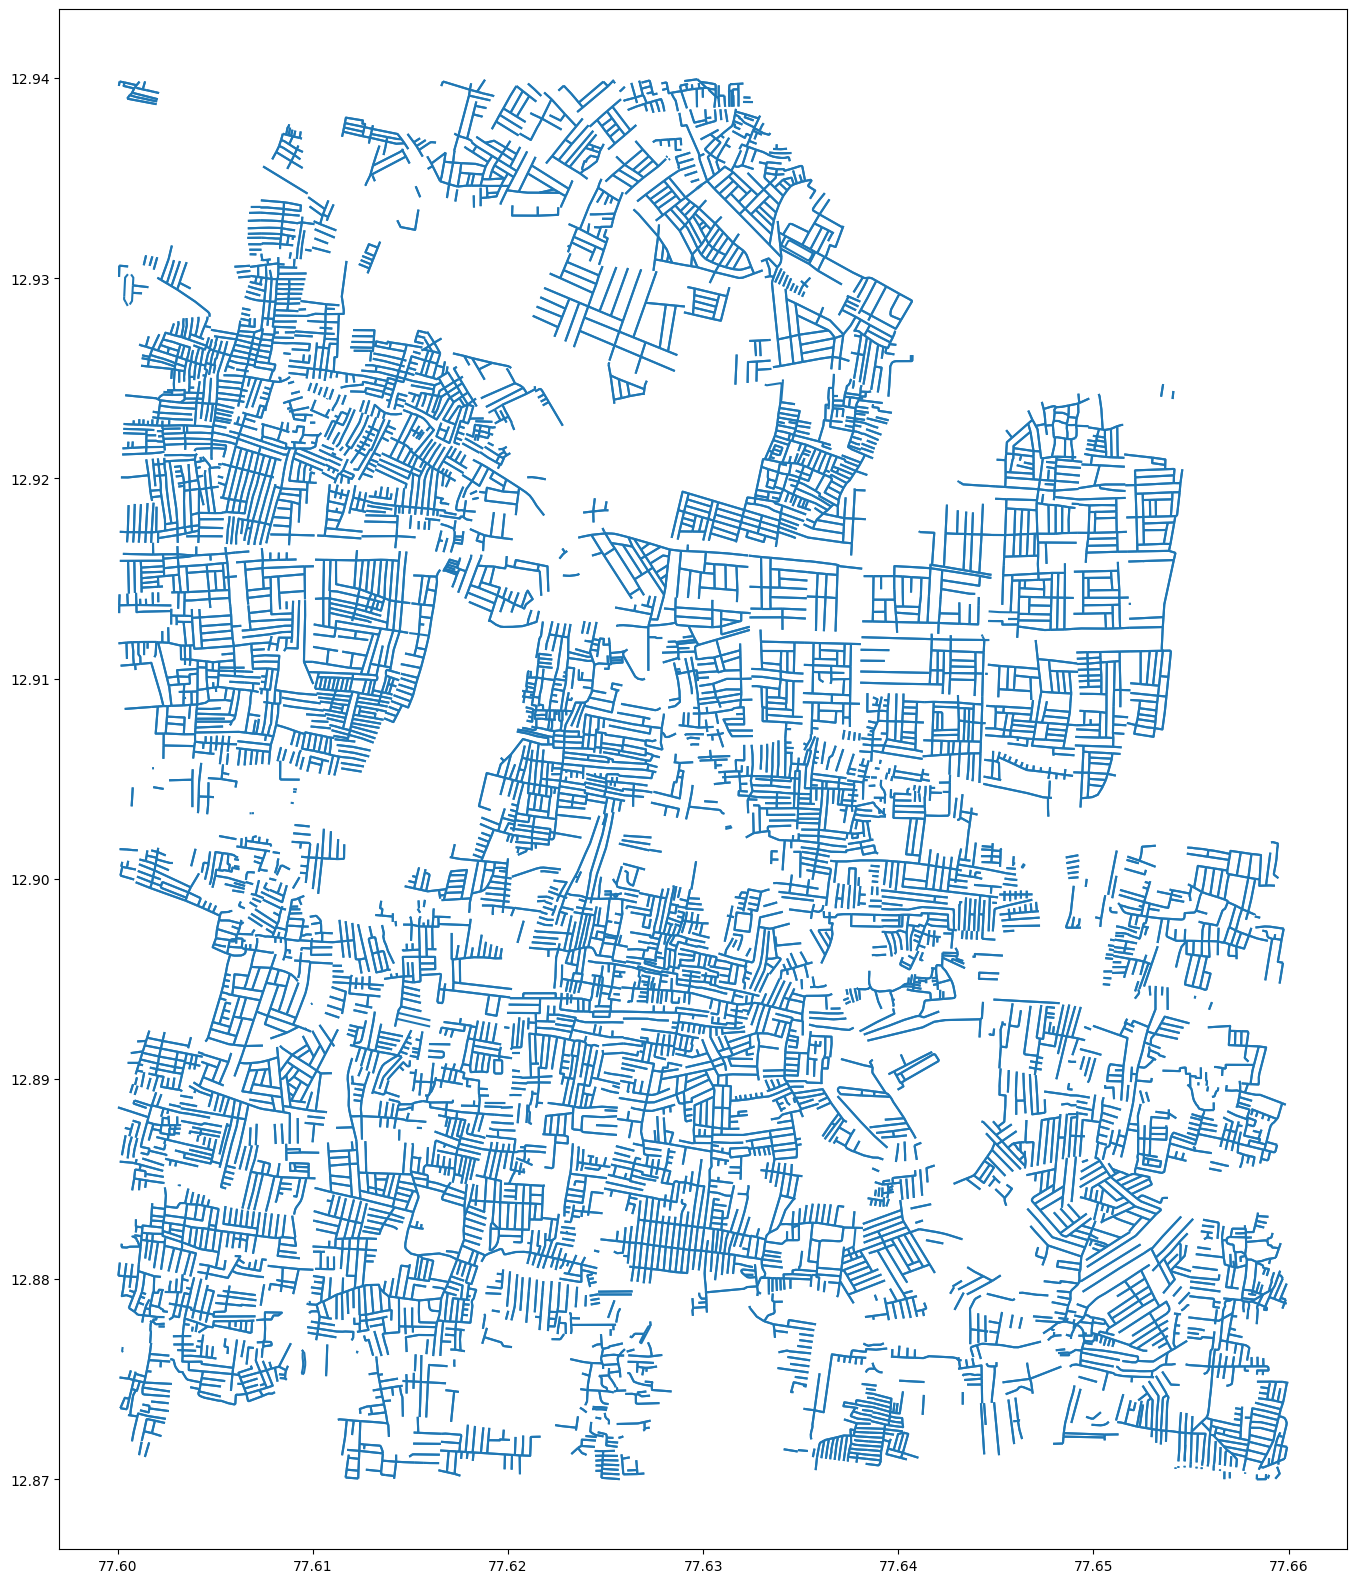

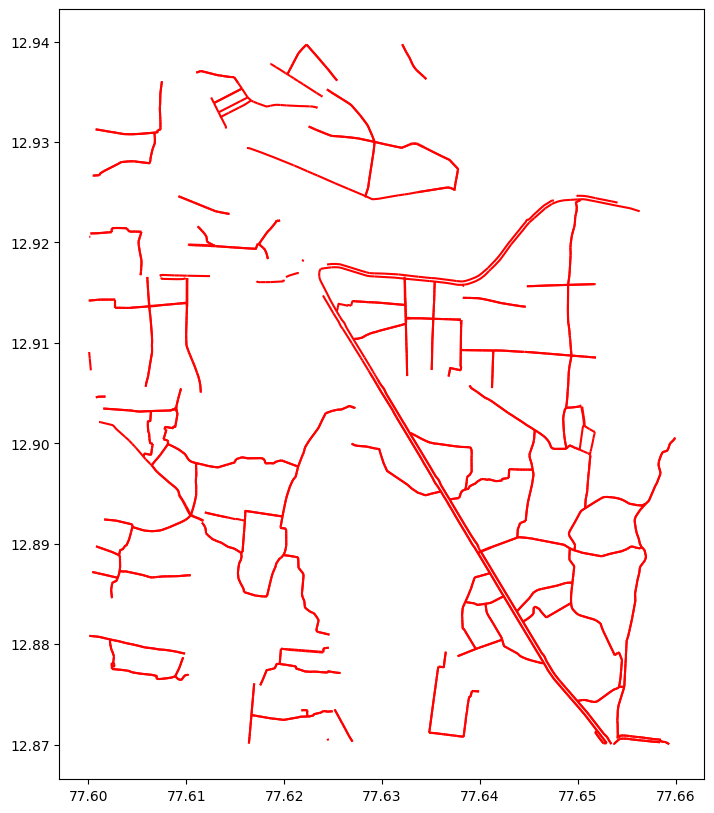

In [ ]:
residential=edges[edges['highway']=='residential']
residential.plot(figsize=(20,20))


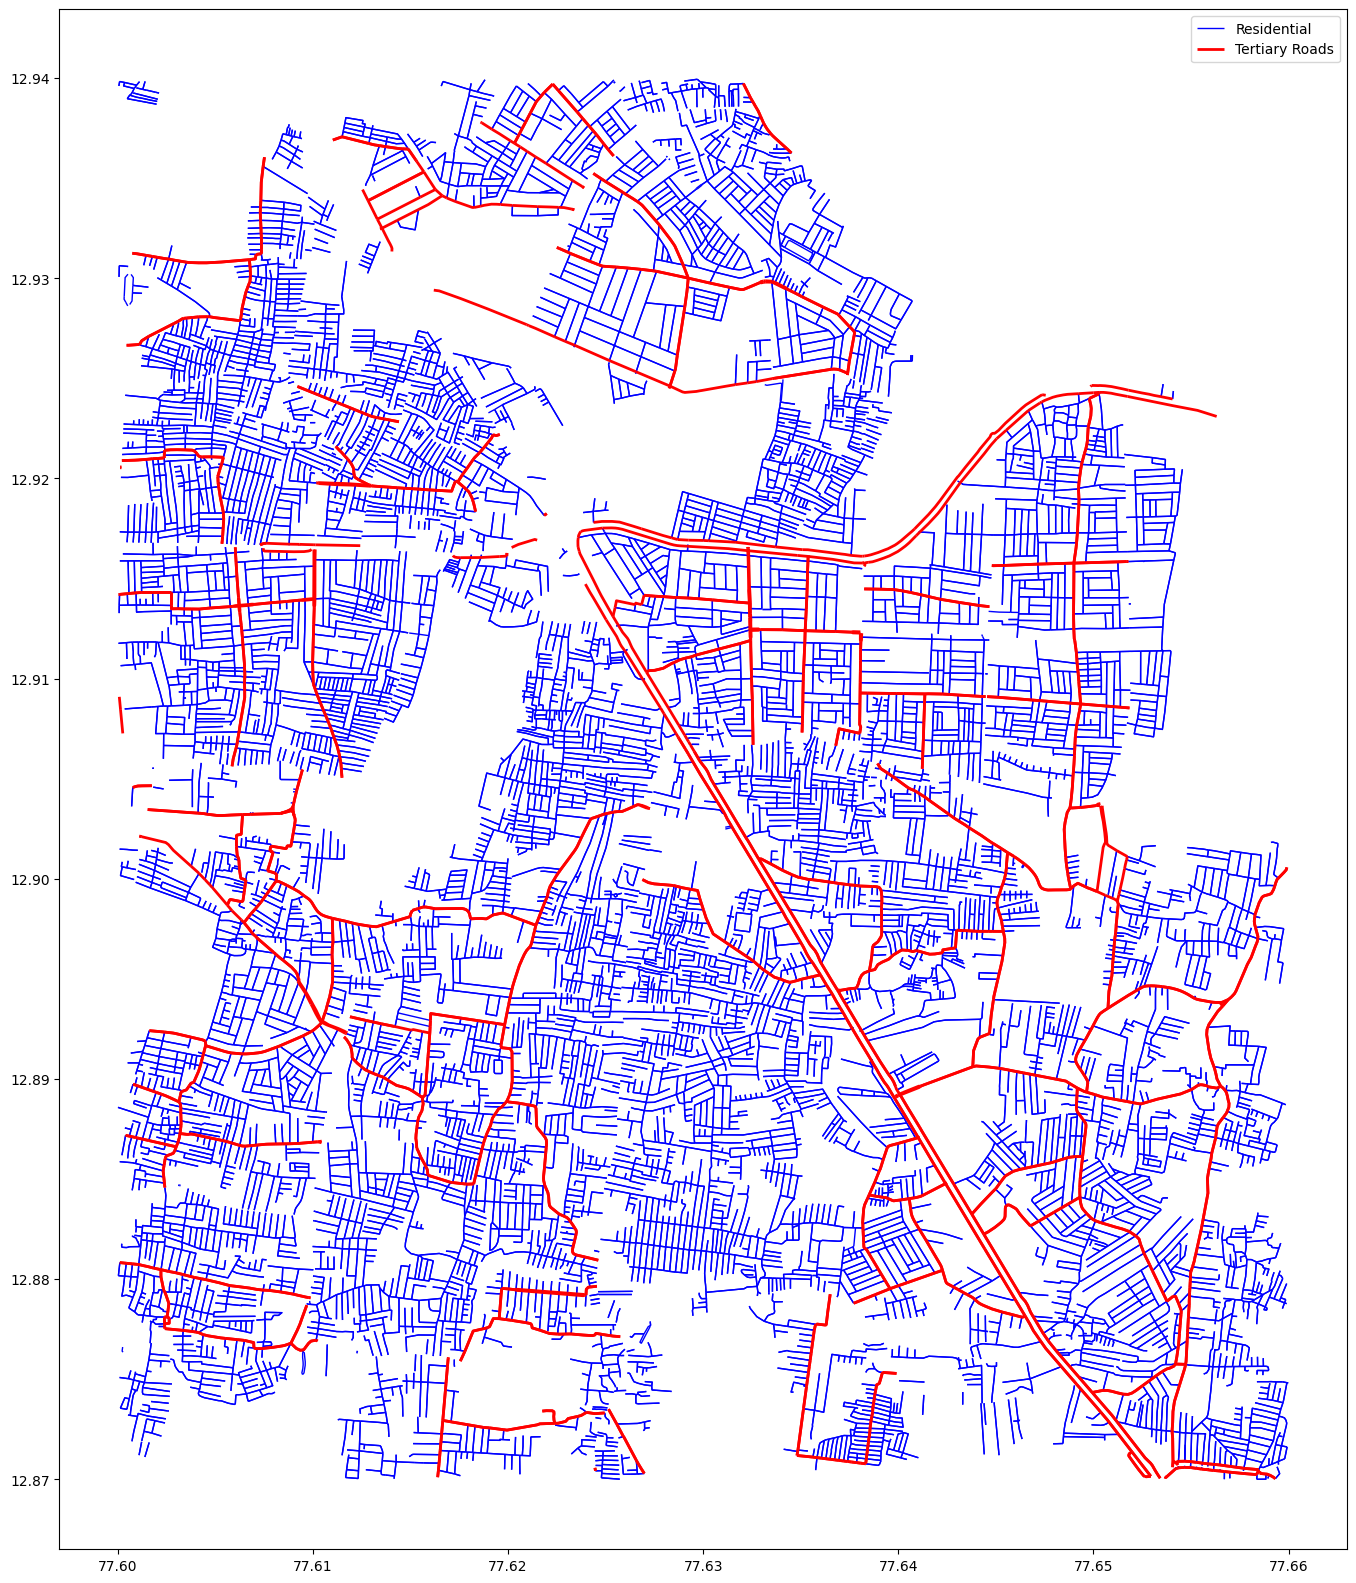

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
residential.plot(ax=ax, color="blue", linewidth=1, label="Residential")
tertiary.plot(ax=ax, color="red", linewidth=2, label="Tertiary Roads")
plt.legend()
plt.show()


In [23]:
import folium
from folium.plugins import HeatMap

buildings = gpd.read_file("map.osm", layer="multipolygons")
m = folium.Map(location=[12.934, 77.624], zoom_start=15)

for _, row in buildings.iterrows():
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=3,
        color="blue",
        fill=True,
    ).add_to(m)

m.save("silk_board_buildings.html")


1. Define Study Area
2. Road networks(highway,primary,residential)
3. Buildings and land use
4. Infrasturcutre features
5. Extract building types
6. road network analysis-identify bottlenecls
7. emergency response planning
8. exposure heatmaps
9. plotting risk maps
10. report

<Axes: >

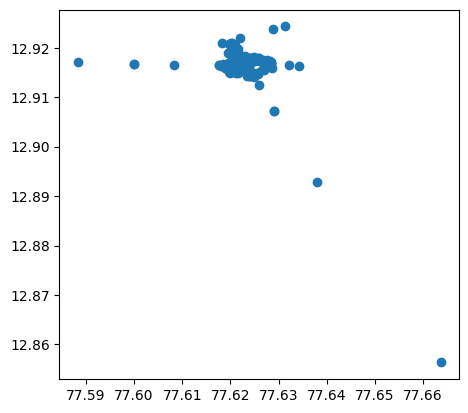

In [60]:
points=gpd.read_file('map.osm',layer='points')
points.plot()

In [34]:
points.head()

osm_id             name barrier          highway   ref address is_in  \
0   306594280             None    None  traffic_signals  None    None  None   
1   494271080             None    None  traffic_signals  None    None  None   
2   650141554             None    None  traffic_signals  None    None  None   
3   946653489  Vinayaka Temple    None             None  None    None  None   
4  1377891917             None    gate             None  None    None  None   

  place man_made                                         other_tags  \
0  None     None                                               None   
1  None     None                                               None   
2  None     None                                               None   
3  None     None  "amenity"=>"place_of_worship","name:kn"=>"ವಿನಾ...   
4  None     None                               "access"=>"military"   

                    geometry  
0  POINT (77.62246 12.91725)  
1  POINT (77.62311 12.91731)  
2   POINT (77.6322 12.91659)  
3  POINT (77.61973 12.91507)  
4   POINT (77.6314 12.92431)

In [ ]:
# plot for traffic signals and other stuff in highway

In [91]:
name=points['name'].dropna().unique()

In [61]:
points['highway'].value_counts()

highway
street_lamp        46
bus_stop           15
traffic_signals     6
crossing            3
Name: count, dtype: int64

In [66]:
traffic_signals=points[points['highway']=='traffic_signals']

<Axes: >

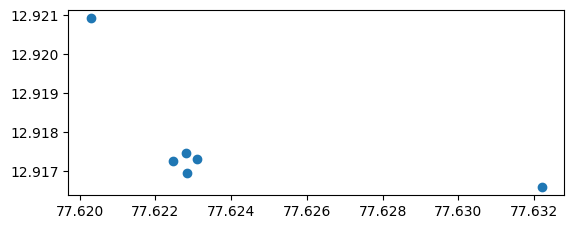

In [68]:
traffic_signals.plot()

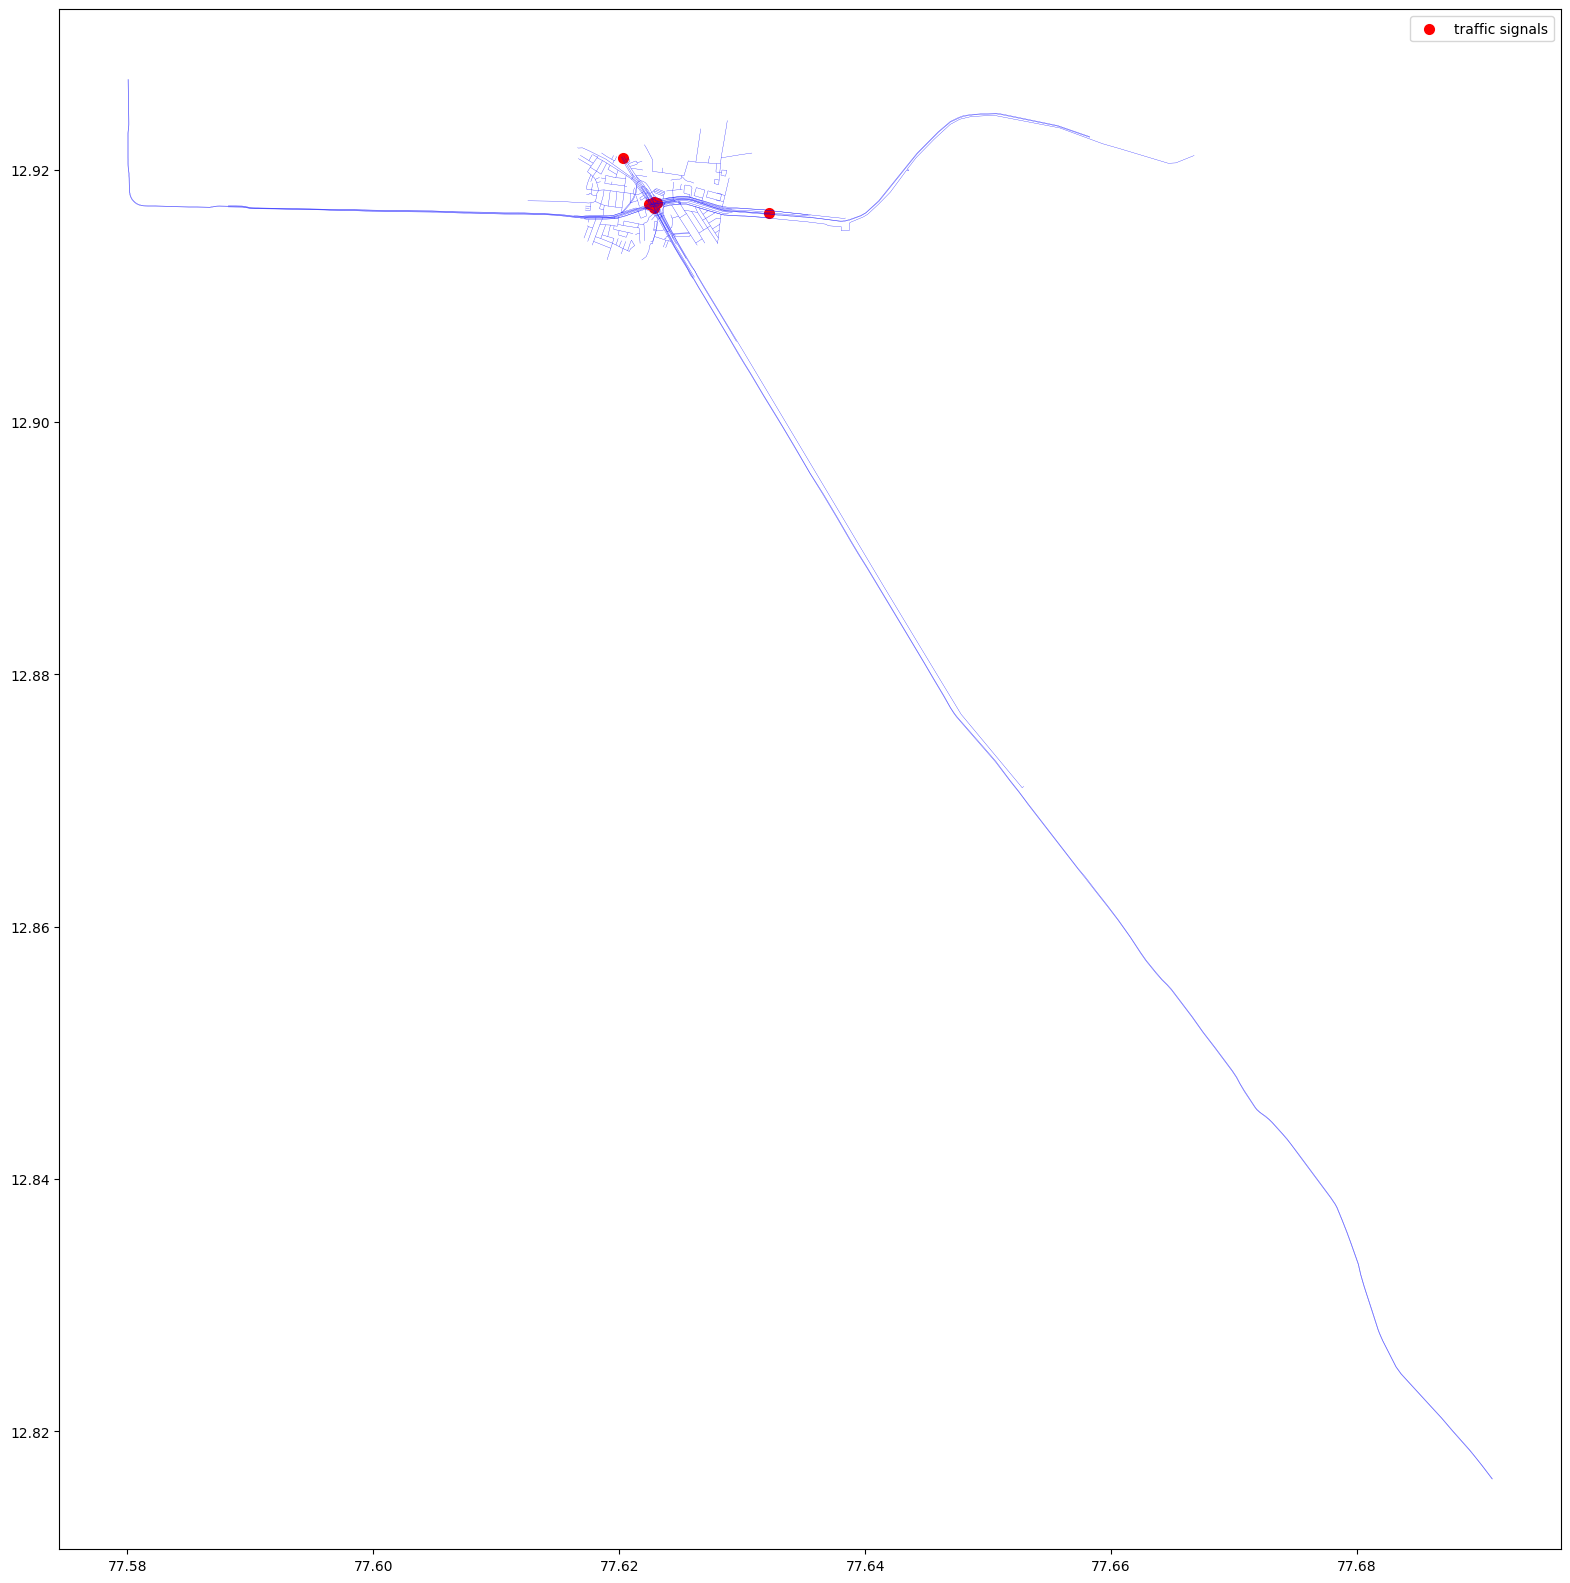

In [ ]:
fig,ax=plt.subplots(figsize=(20, 20))
roads.plot(ax=ax, color="blue",linewidth=0.2)
traffic_signals.plot(ax=ax, color="red", linewidth=2, label="traffic signals")
plt.legend()
plt.show()

In [75]:
lamps=points[points['highway']=='street_lamp']

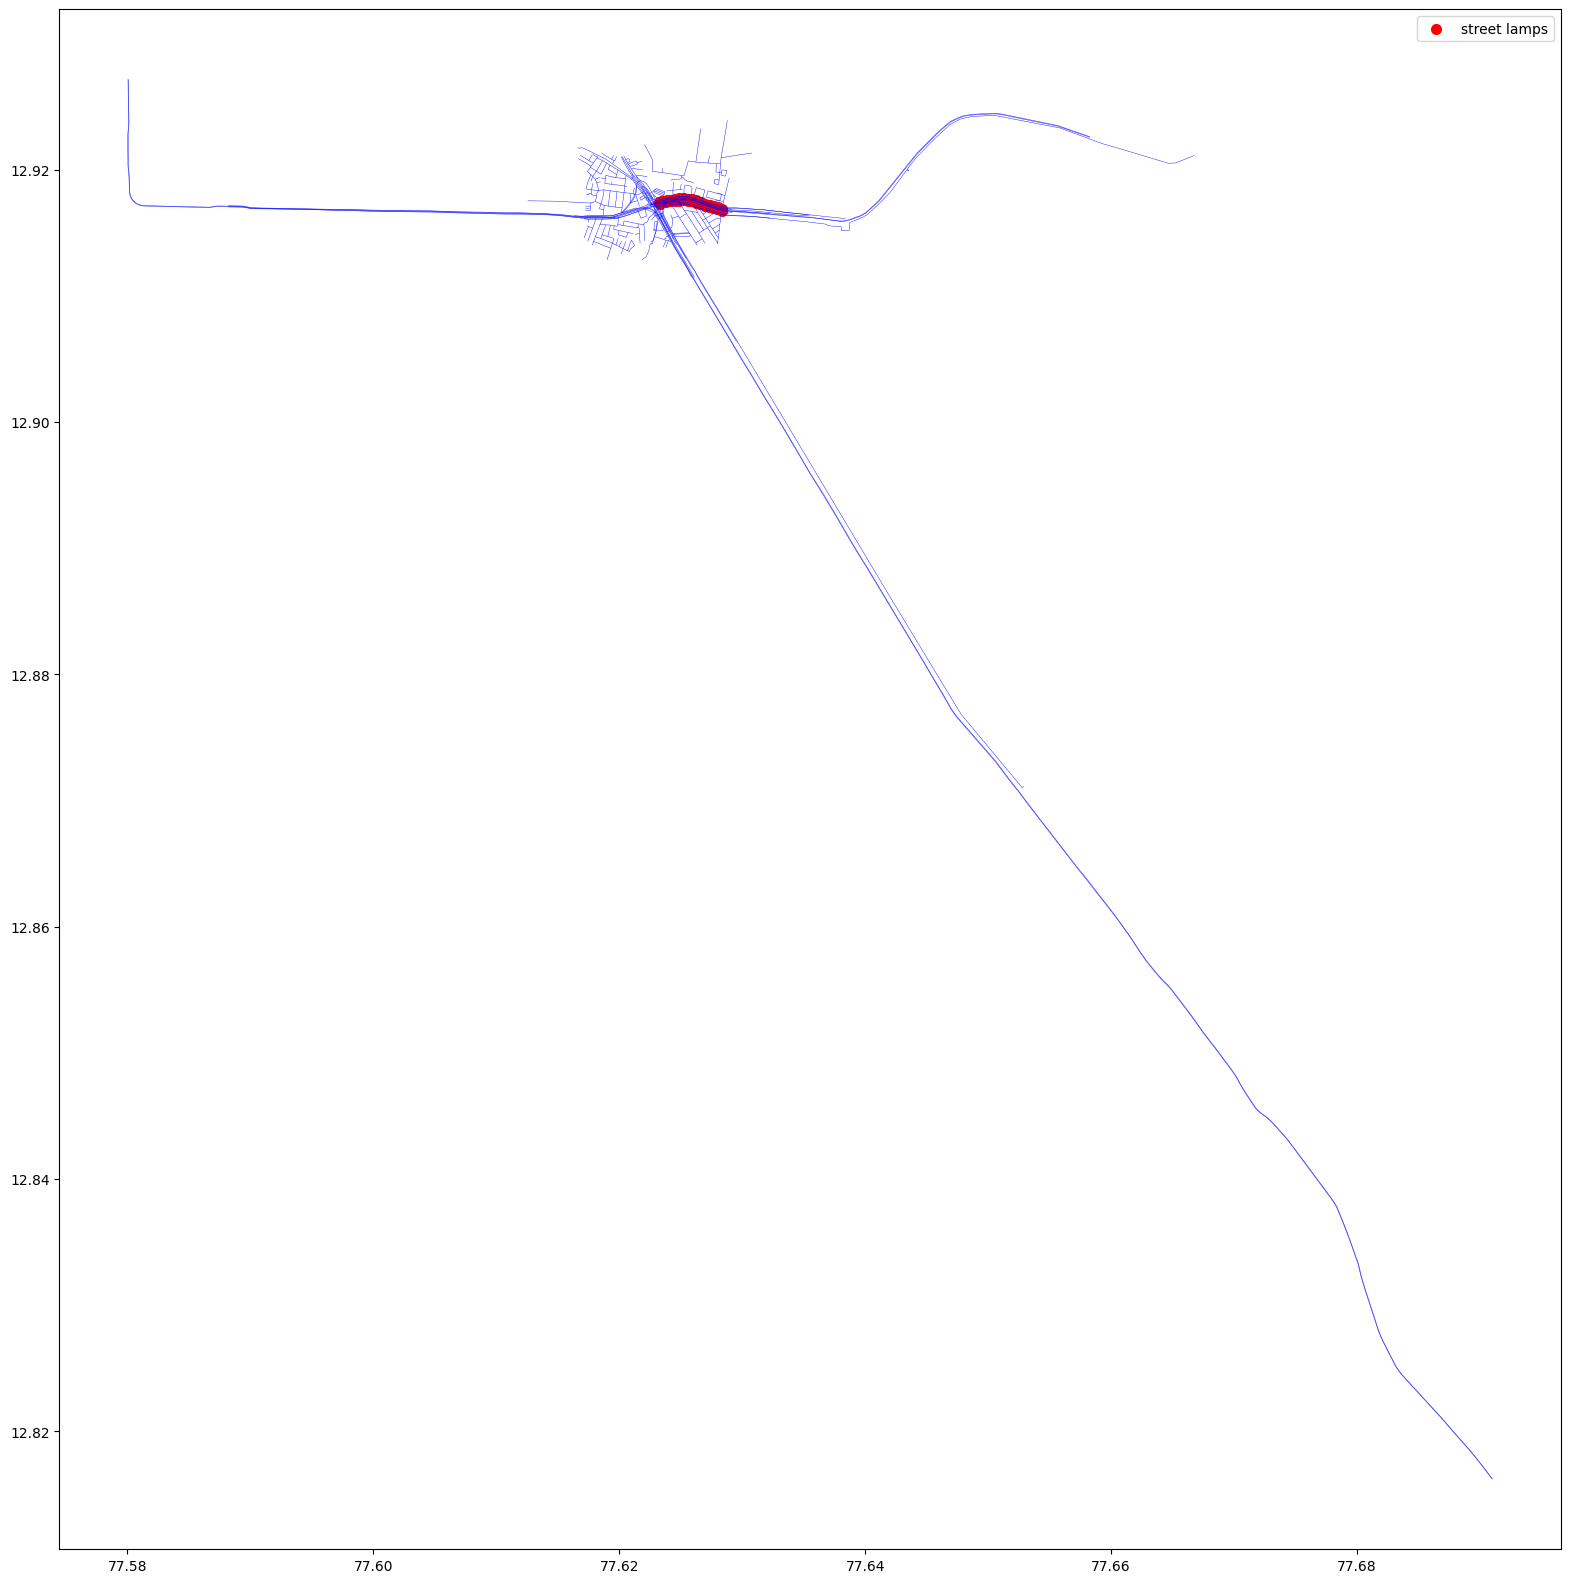

In [80]:
fig,ax=plt.subplots(figsize=(20, 20))
roads.plot(ax=ax,color='blue',linewidth=0.3)
lamps.plot(ax=ax, color="red", linewidth=2, label="street lamps")
plt.legend()
plt.show()

In [83]:
bus_stop=points[points['highway']=='bus_stop']

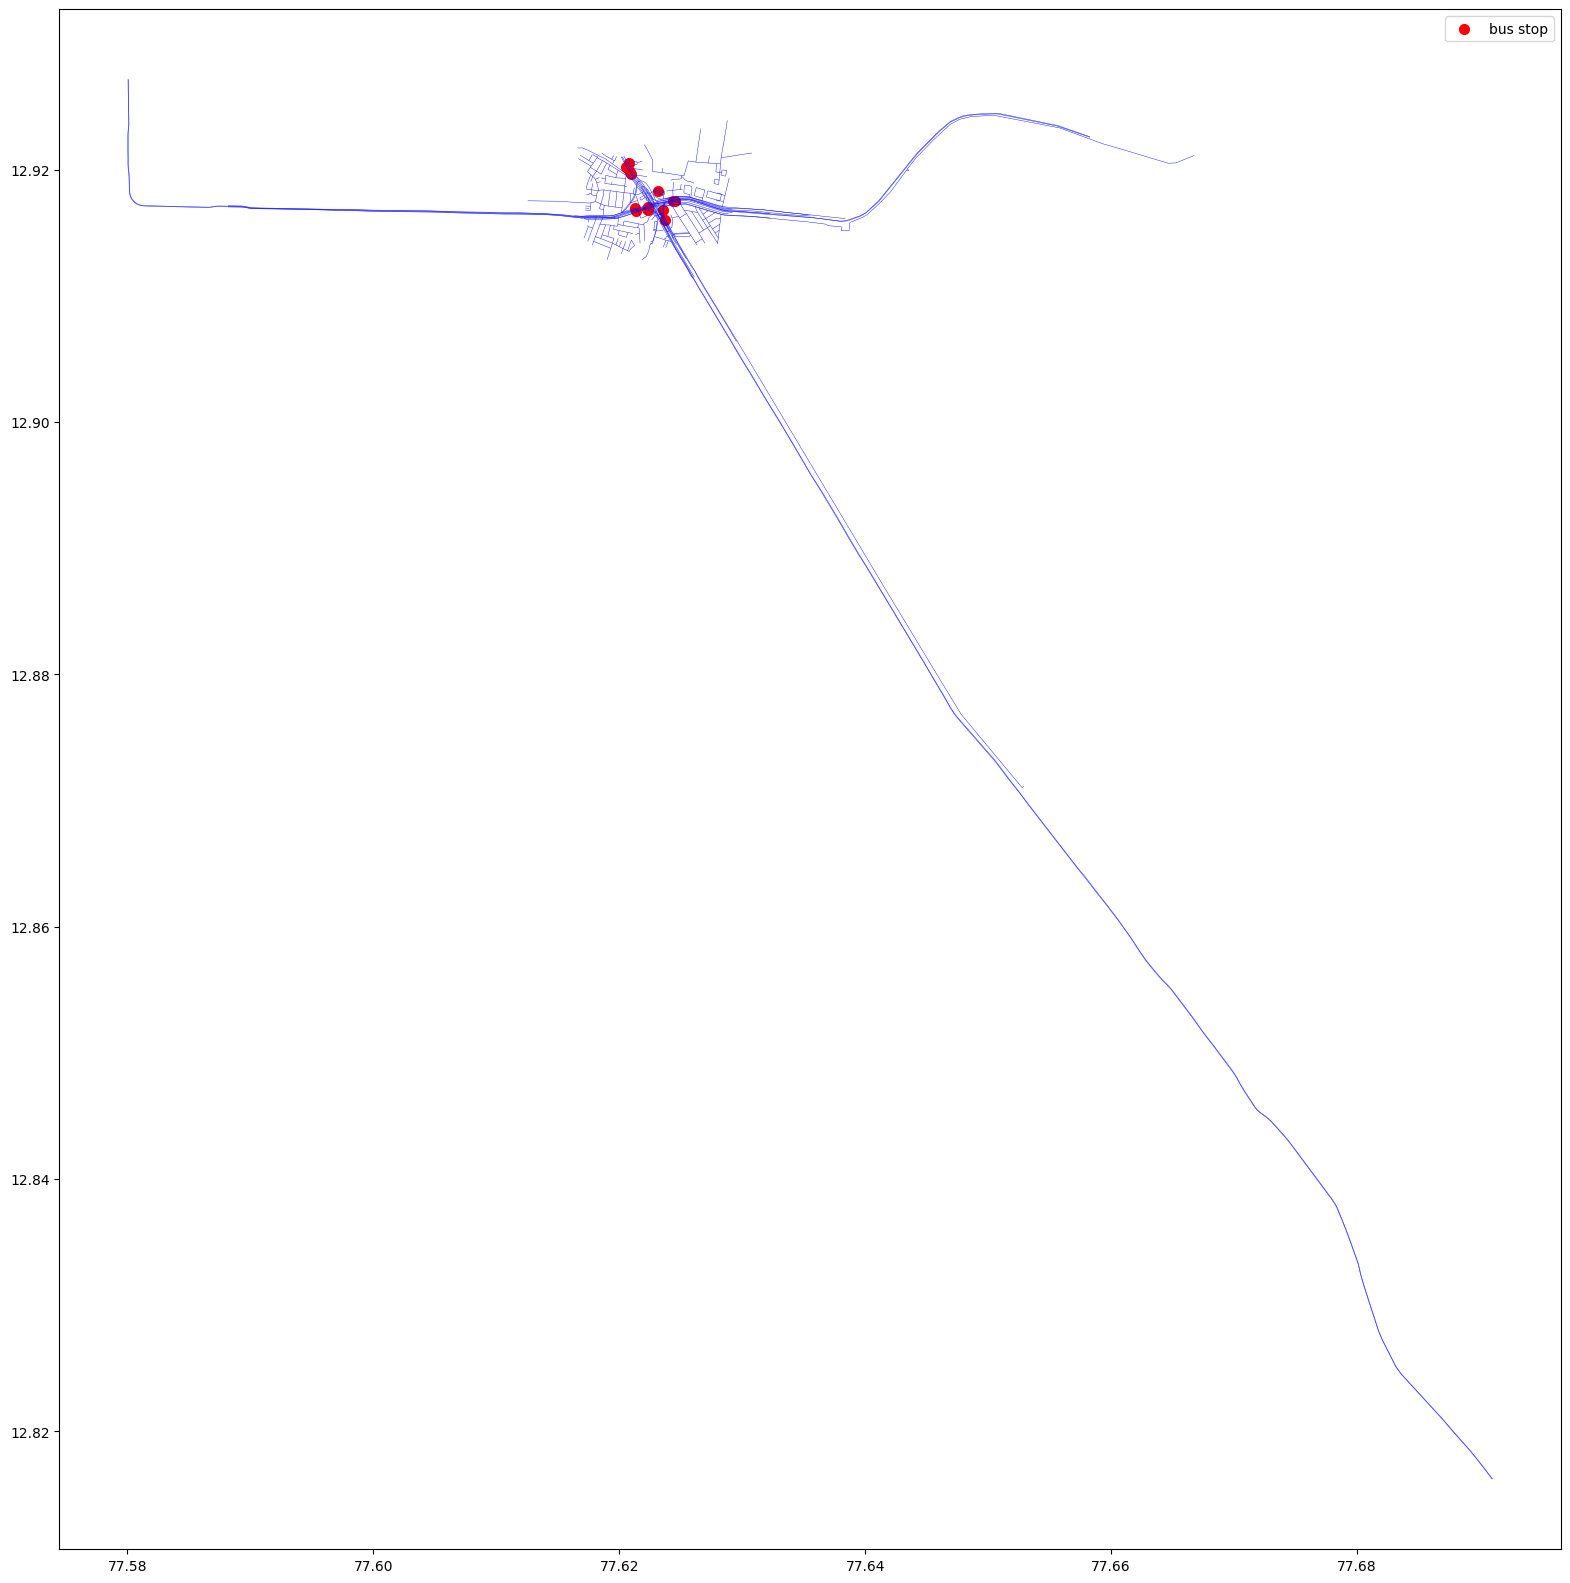

In [84]:
fig,ax=plt.subplots(figsize=(20, 20))
roads.plot(ax=ax,color='blue',linewidth=0.3)
bus_stop.plot(ax=ax, color="red", linewidth=2, label="bus stop")
plt.legend()
plt.show()

In [85]:
crossing=points[points['highway']=='crossing']

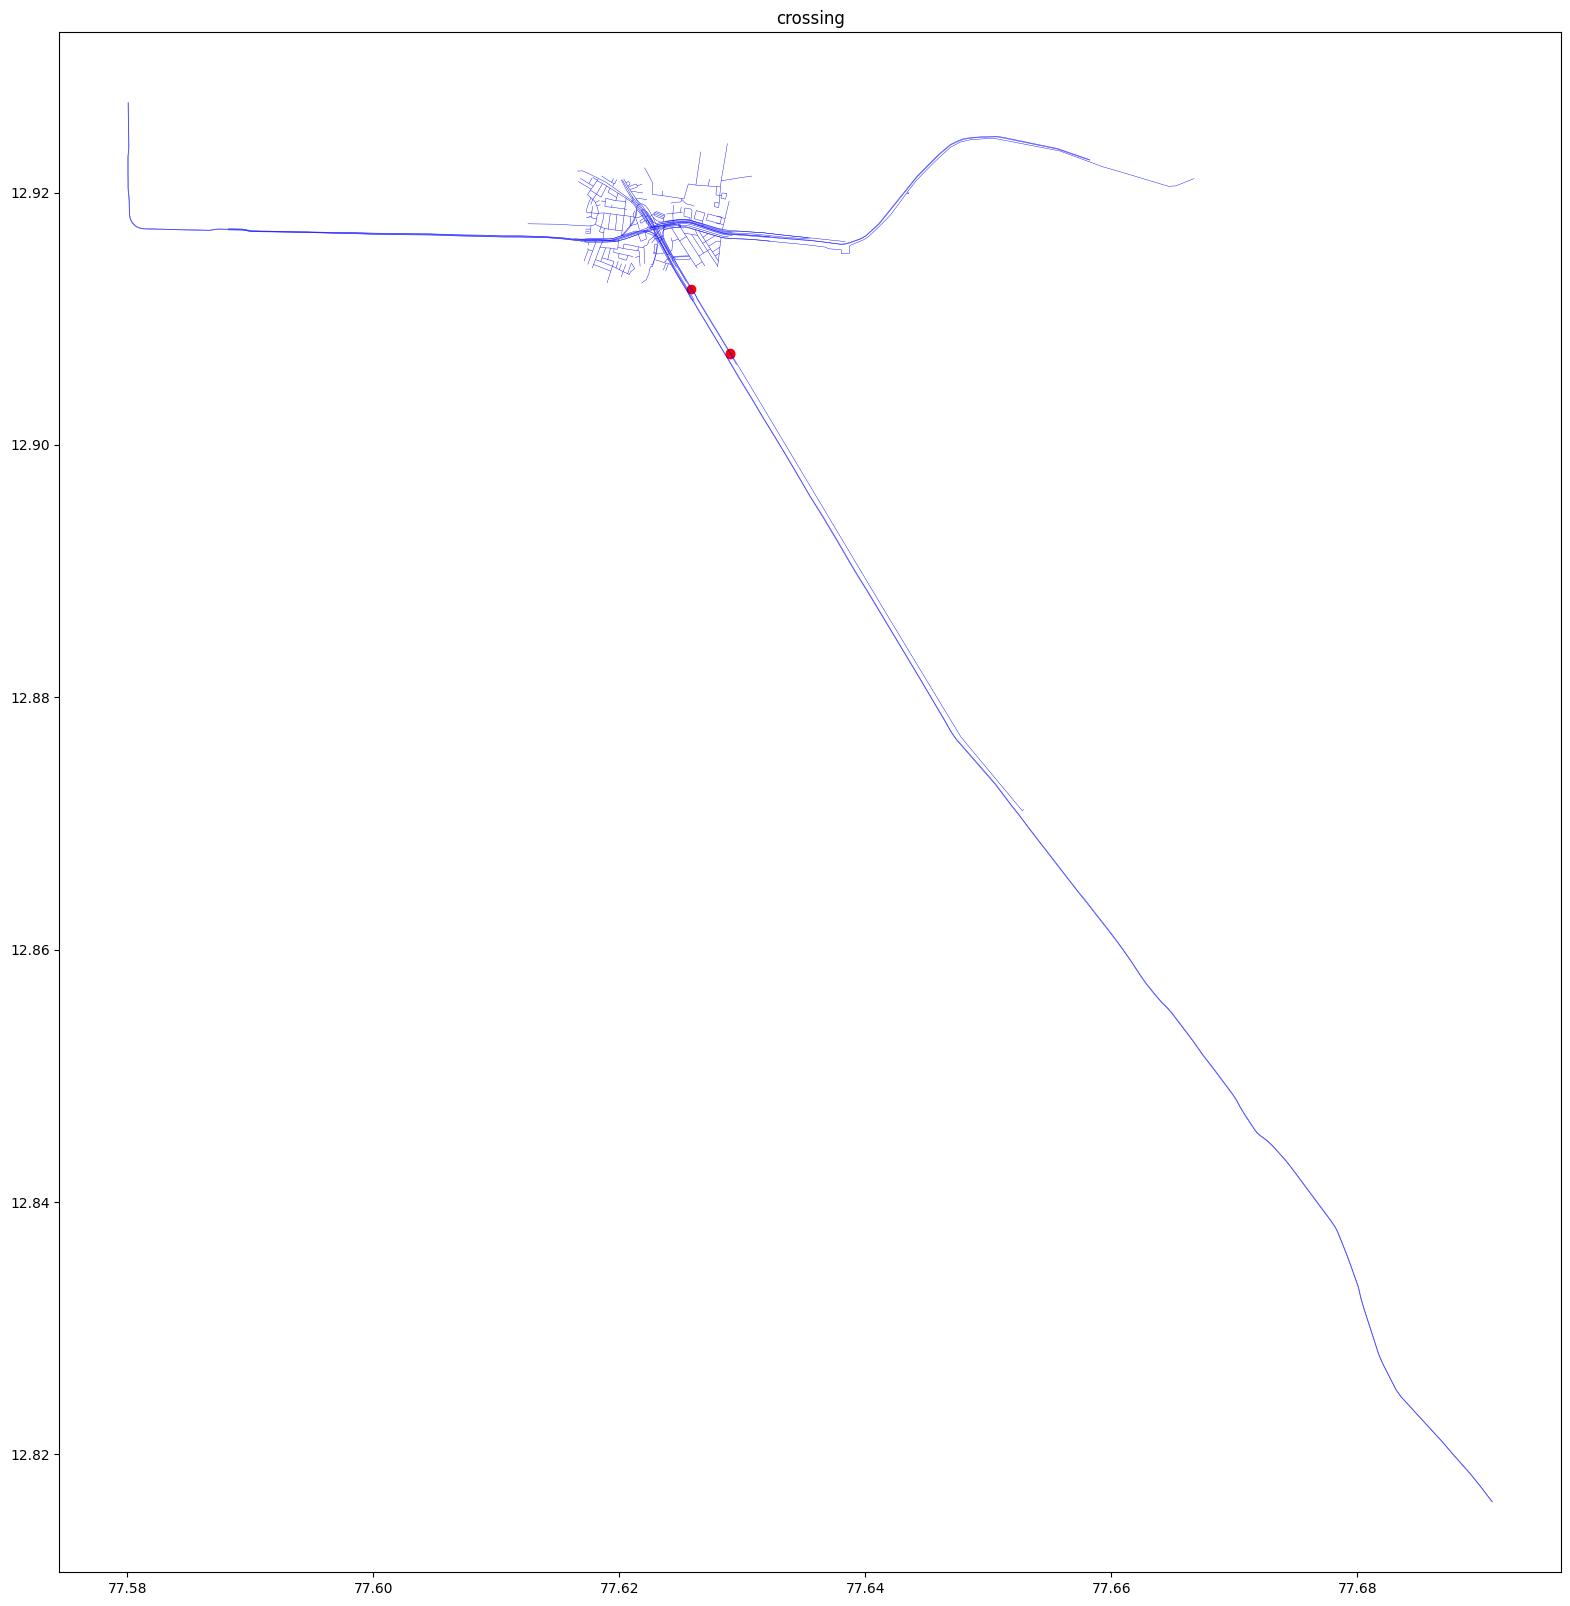

In [88]:
fig,ax=plt.subplots(figsize=(20,20))
roads.plot(ax=ax,linewidth=0.3,color='blue')
crossing.plot(ax=ax,color='red',label='crossing')
plt.title('crossing')
plt.show()

In [95]:
name_location = points[points['name'].isin(name)]

In [96]:
name_location.head()

osm_id                         name barrier highway   ref address  \
3    946653489              Vinayaka Temple    None    None  None    None   
5   1467918892            NIIT Technologies    None    None  None    None   
6   1471690115            Tara Fiat Service    None    None  None    None   
9   1474317196  Karanth Speciality Hospital    None    None  None    None   
10  1474433302      Preethi Bakery & Sweets    None    None  None    None   

   is_in place man_made                                         other_tags  \
3   None  None     None  "amenity"=>"place_of_worship","name:kn"=>"ವಿನಾ...   
5   None  None     None  "addr:street"=>"Rupena Agrahara, Hosur Road, B...   
6   None  None     None   "addr:street"=>"Hosur road","shop"=>"car_repair"   
9   None  None     None  "addr:district"=>"Bengaluru Rural","addr:full"...   
10  None  None     None                                   "shop"=>"bakery"   

                     geometry  
3   POINT (77.61973 12.91507)  
5   POINT (77.62426 12.91519)  
6   POINT (77.62392 12.91452)  
9   POINT (77.61936 12.91601)  
10  POINT (77.61849 12.91678)

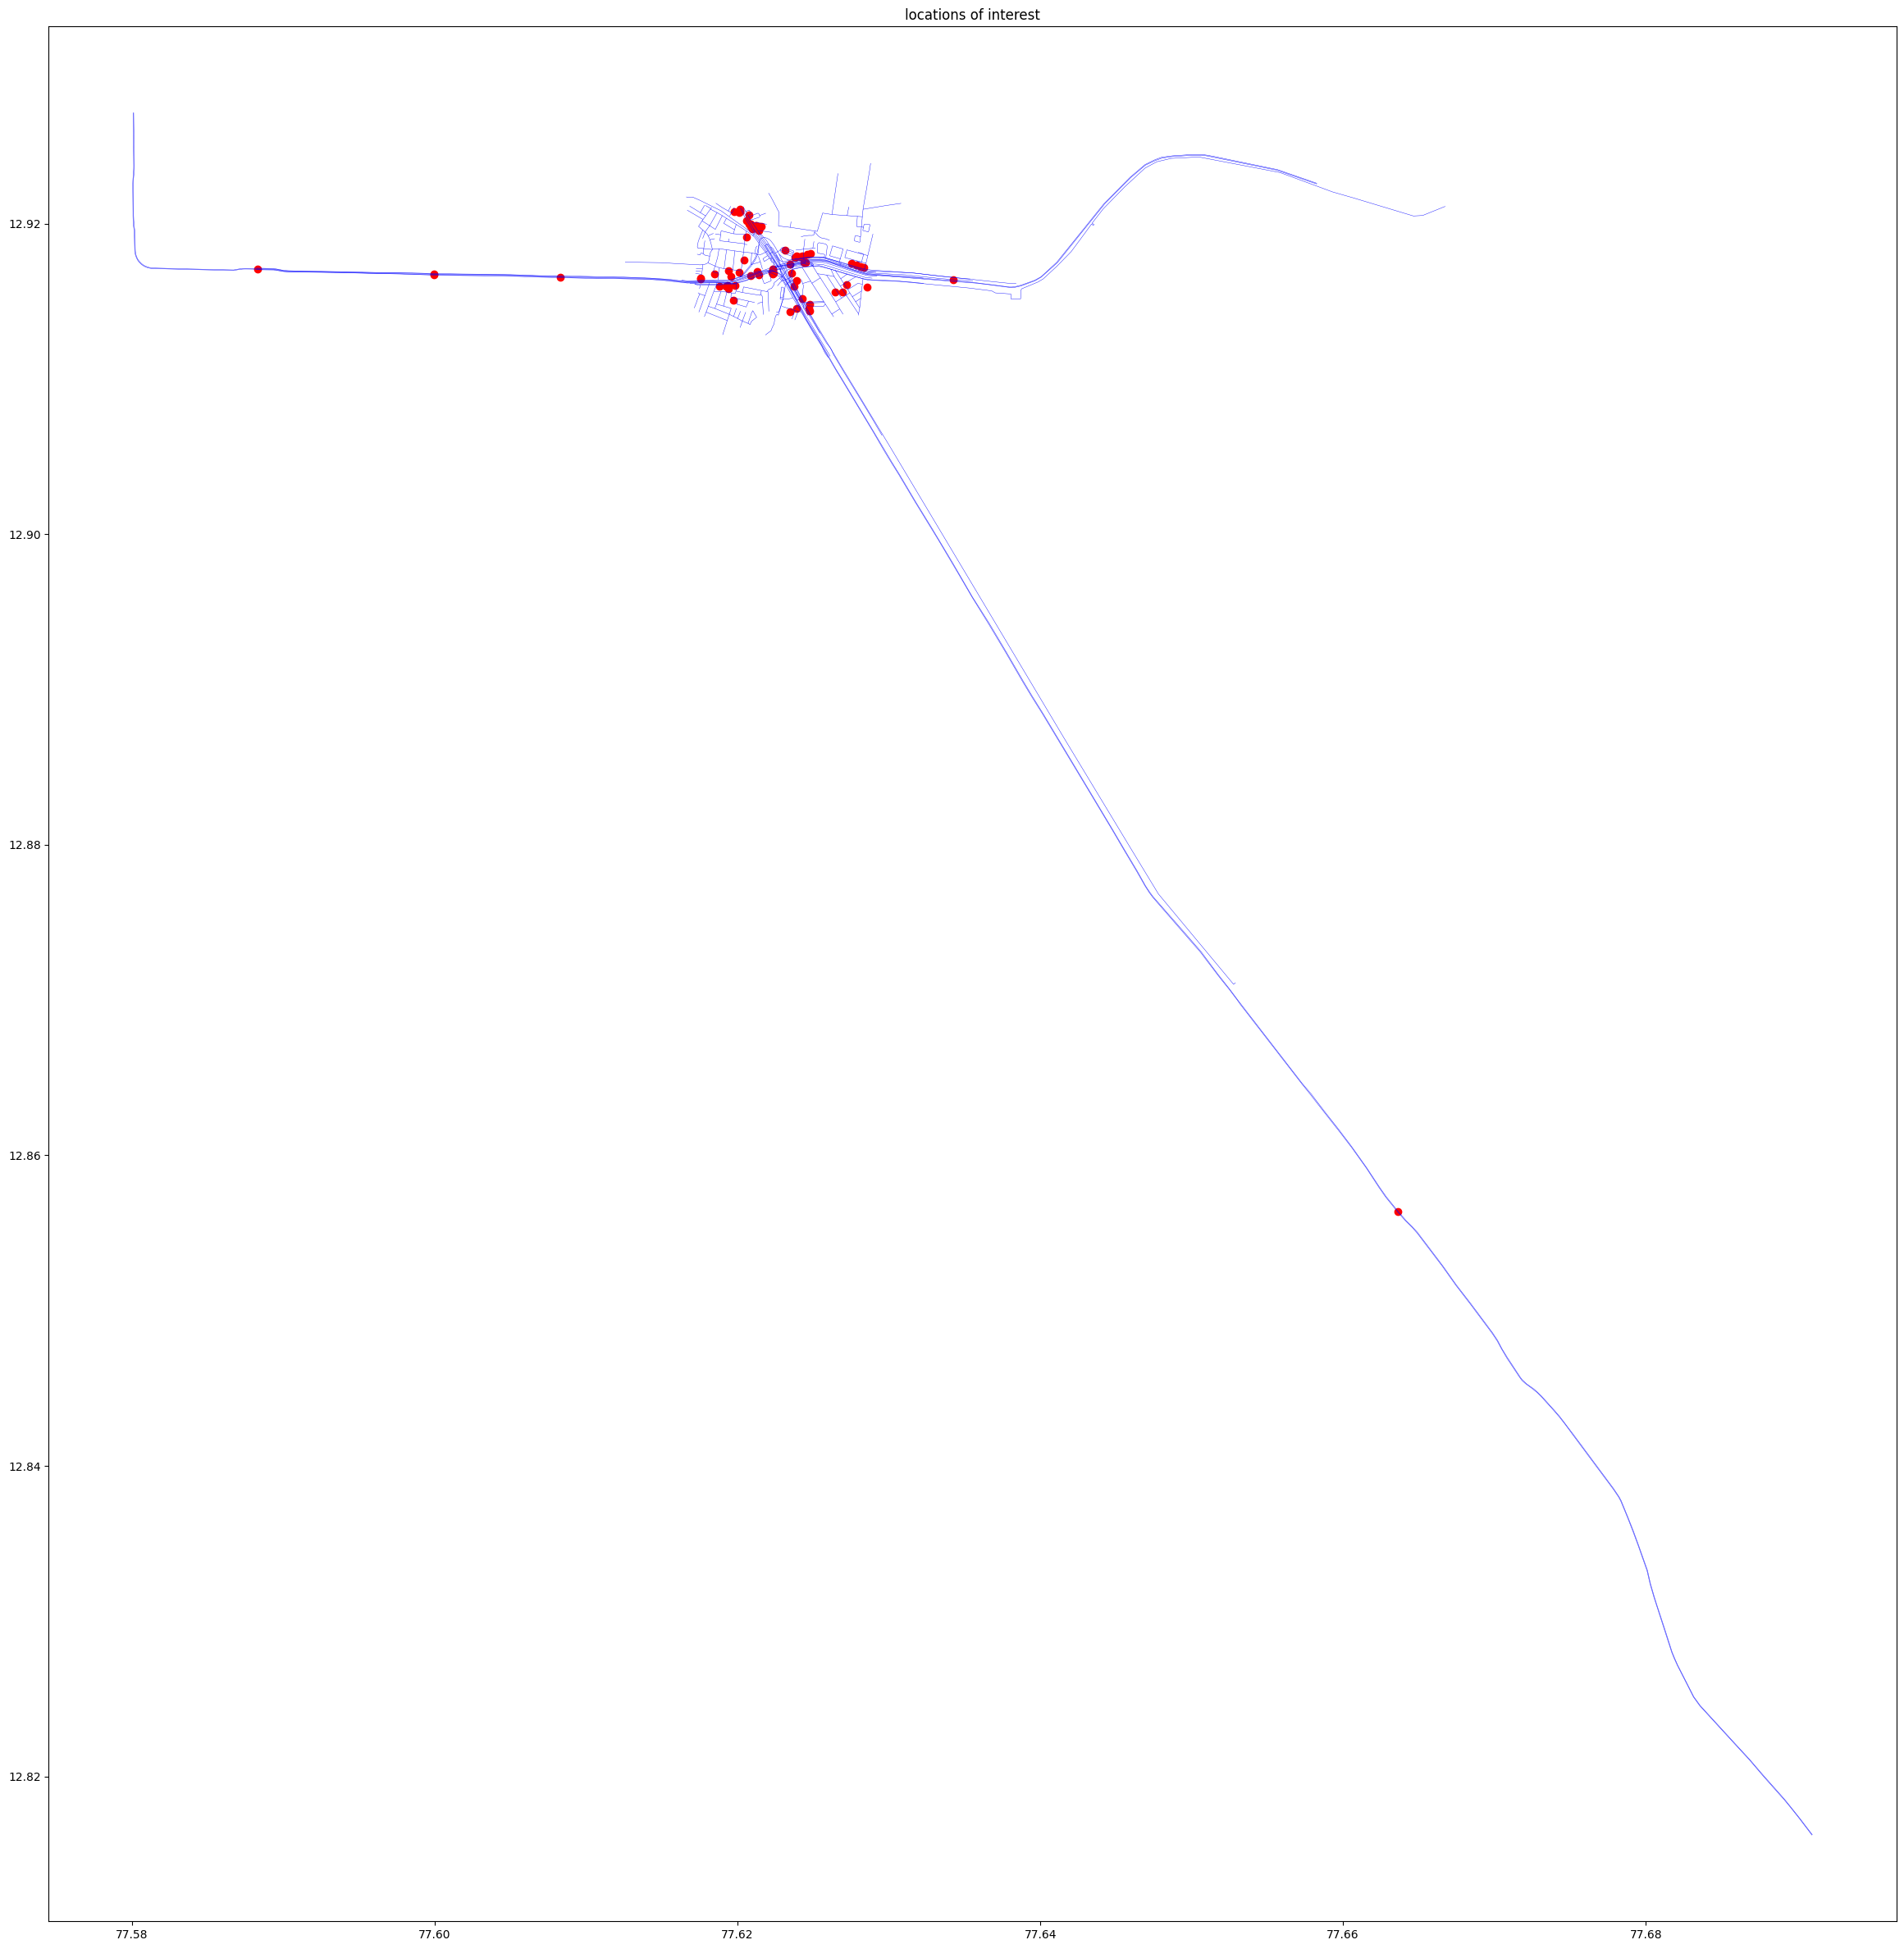

In [98]:
fig,ax=plt.subplots(figsize=(30,30))
roads.plot(ax=ax,linewidth=0.3,color='blue',label='POI')
name_location.plot(ax=ax,color='red')
plt.title('locations of interest')
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

m = folium.Map(location=[name_location.geometry.y.mean(), name_location.geometry.x.mean()], zoom_start=15)

for _, road in roads.iterrows():
    if road.geometry.geom_type == "LineString": 
        folium.PolyLine(
            locations=[(point[1], point[0]) for point in road.geometry.coords],  
            color="blue",
            weight=1,
            opacity=0.5
        ).add_to(m)

marker_cluster = MarkerCluster().add_to(m) 
for _, row in name_location.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=row['name'], 
        tooltip=row['name'], 
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

m.save("interactive_map.html")

<Axes: >

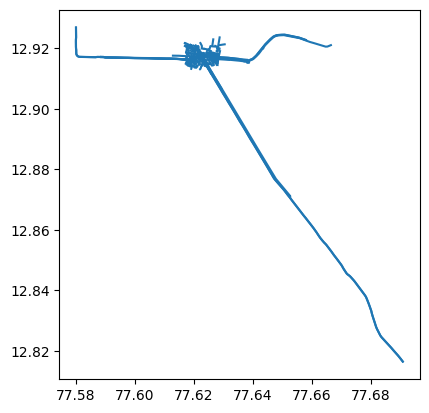

In [108]:
roads.plot()

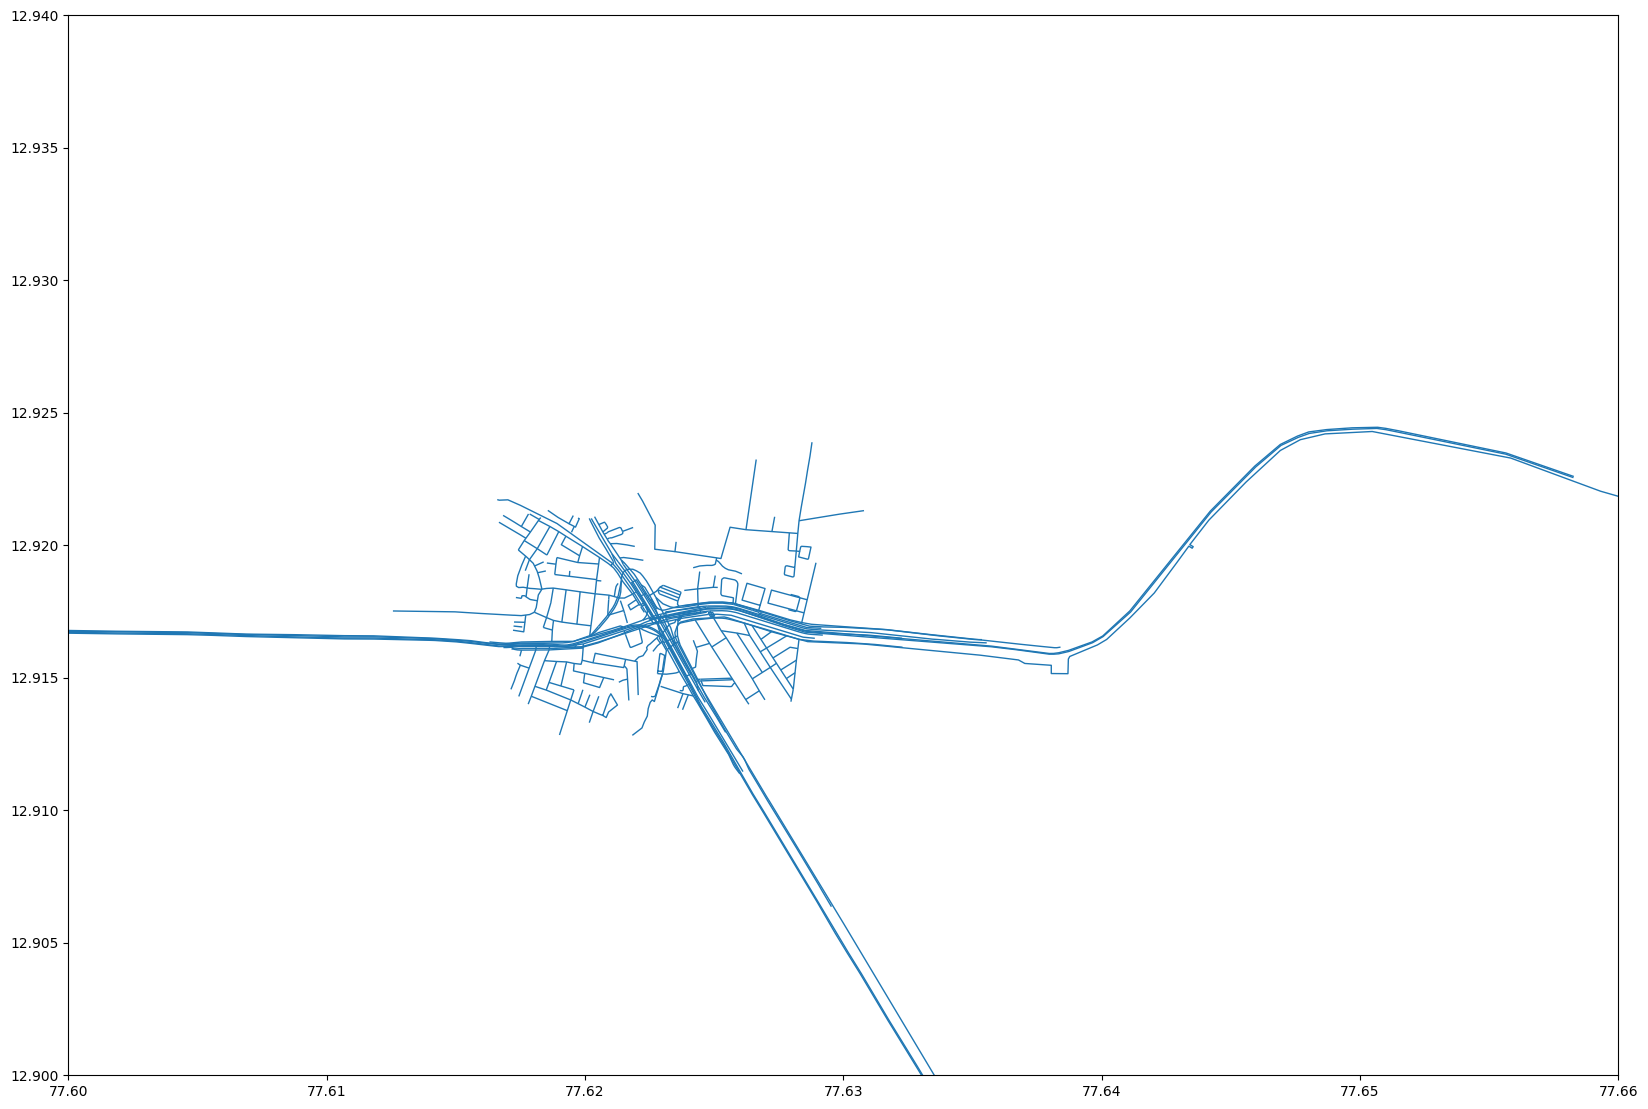

In [118]:
roads=gpd.read_file('map.osm', layer='lines')
fig, ax = plt.subplots(figsize=(20,20))
roads.plot(ax=ax, linewidth=1)
ax.set_xlim([77.60, 77.66]) 
ax.set_ylim([12.90, 12.94]) 
plt.show()


In [119]:
roads.head()

osm_id               name      highway waterway aerialway barrier  \
0  27555707    Outer Ring Road        trunk     None      None    None   
1  27934861      1st Main Road  residential     None      None    None   
2  27934864               None  residential     None      None    None   
3  27934930  14th B Cross Road  residential     None      None    None   
4  27934960    1st C Main Road  residential     None      None    None   

  man_made railway  z_order  \
0     None    None        8   
1     None    None        3   
2     None    None        3   
3     None    None        3   
4     None    None        3   

                                          other_tags  \
0  "lanes"=>"3","maxspeed"=>"40","name:kn"=>"ಹೊರ ...   
1  "lanes"=>"2","name:kn"=>"೧ನೇ ಮುಖ್ಯ ರಸ್ತೆ","sur...   
2                                               None   
3                     "name:kn"=>"೧೪ನೇ ಬಿ ಅಡ್ಡರಸ್ತೆ"   
4                    "name:kn"=>"೧ನೇ ಸೀ ಮುಖ್ನ ರಸ್ತೆ"   

                                            geometry  
0    LINESTRING (77.6226 12.9173, 77.62283 12.91737)  
1  LINESTRING (77.62427 12.91718, 77.62468 12.916...  
2  LINESTRING (77.62622 12.91418, 77.62675 12.91451)  
3  LINESTRING (77.62491 12.91616, 77.62547 12.91651)  
4  LINESTRING (77.62617 12.91706, 77.62638 12.916...

In [120]:
roads['highway'].value_counts()

highway
residential      88
service          62
trunk            35
trunk_link       21
tertiary         17
primary          12
construction      8
tertiary_link     5
footway           5
steps             2
path              1
track             1
living_street     1
Name: count, dtype: int64

In [133]:
residential=roads[roads['highway']=='residential']
service=roads[roads['highway']=='service']
trunk=roads[roads['highway']=='trunk']
trunk_link=roads[roads['highway']=='trunk_link']
tertiary=roads[roads['highway']=='tertiary']
primary=roads[roads['highway']=='primary']
construction=roads[roads['highway']=='construction']
tertiary_link=roads[roads['highway']=='tertiary_link']
footway=roads[roads['highway']=='footway']
steps=roads[roads['highway']=='steps']
track=roads[roads['highway']=='track']
path=roads[roads['highway']=='path']
living_street=roads[roads['highway']=='living_street']

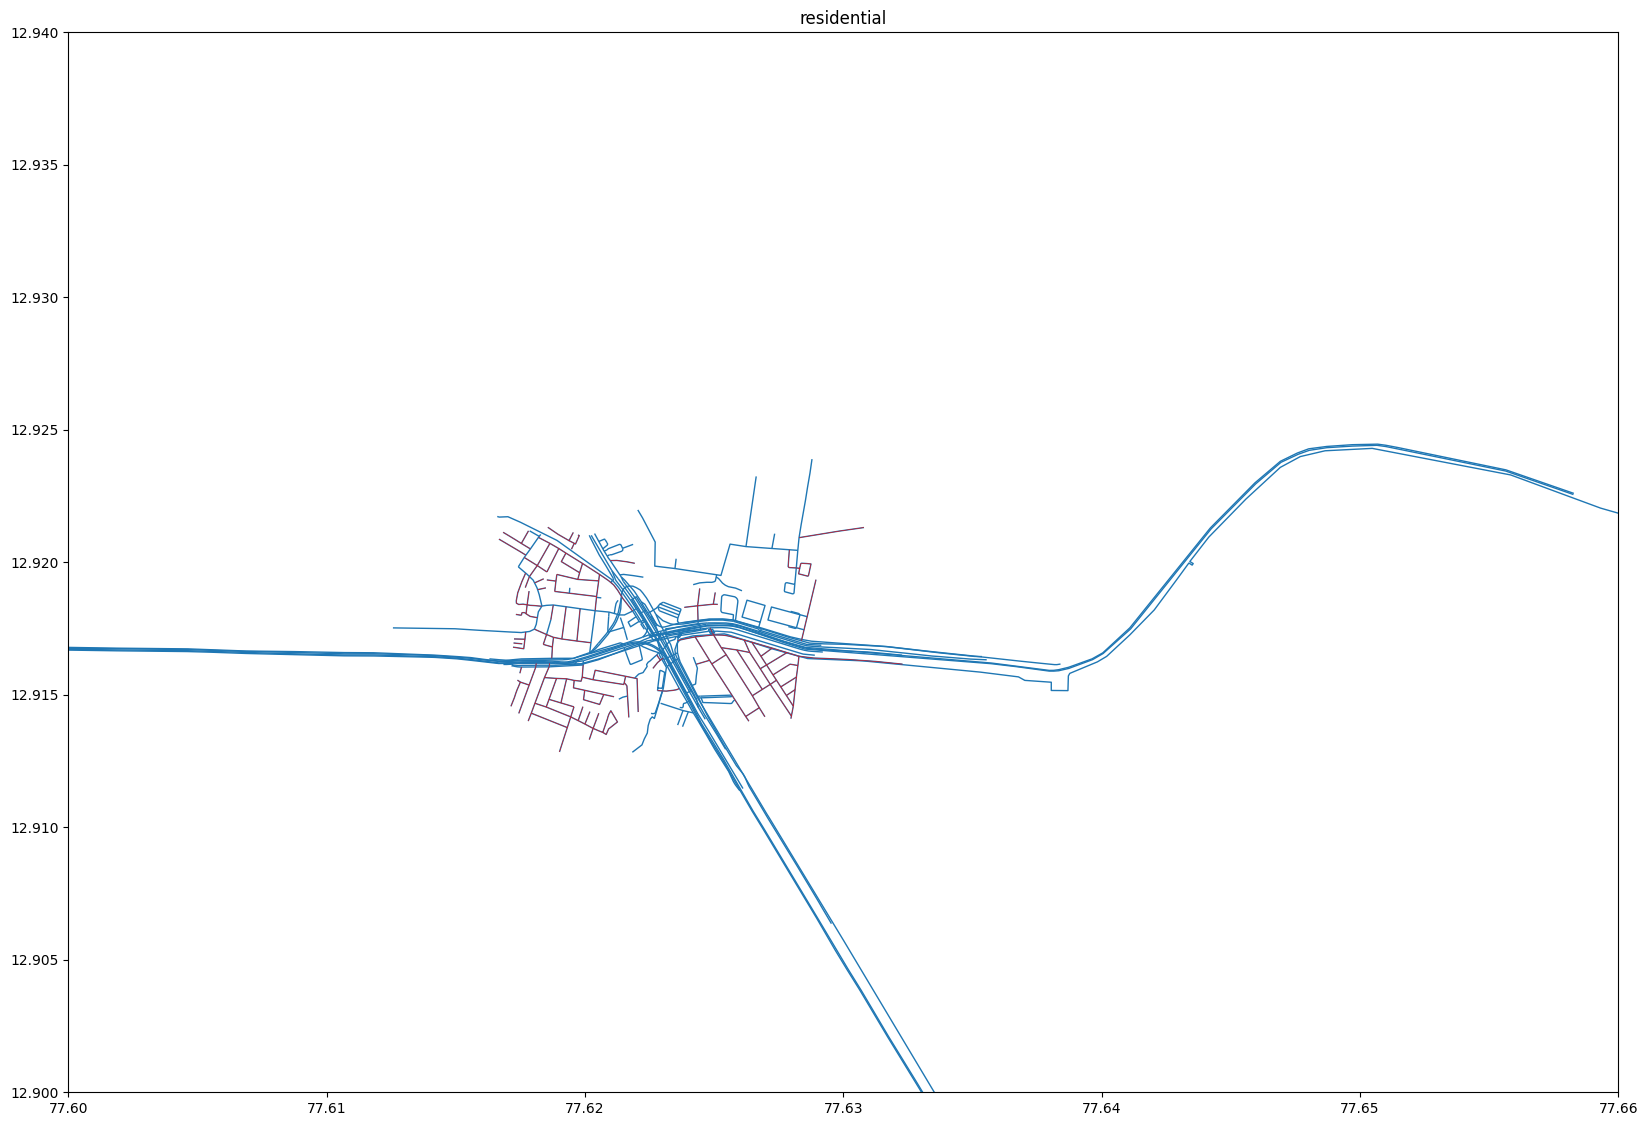

In [141]:
fig,ax=plt.subplots(figsize=(20,20))
roads.plot(ax=ax,linewidth=1)
residential.plot(ax=ax,color='red',linewidth=0.4,label='residential')
ax.set_xlim([77.60, 77.66]) 
ax.set_ylim([12.90, 12.94]) 
plt.title('residential')
plt.show()

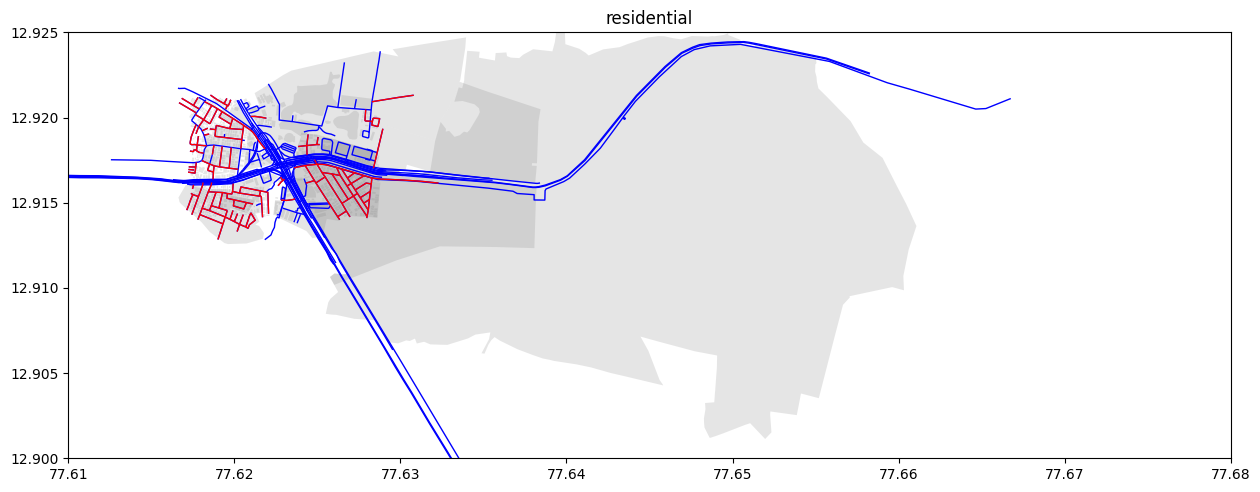

In [165]:
area=gpd.read_file('map.osm',layer='multipolygons')
fig,ax=plt.subplots(figsize=(15,15))
roads.plot(ax=ax,linewidth=1,color='blue')
residential.plot(ax=ax,color='red',linewidth=1,label='residential')
area.plot(ax=ax,color='grey',alpha=0.2)
ax.set_xlim([77.61, 77.68]) 
ax.set_ylim([12.90, 12.925]) 
plt.title('residential')
plt.show()

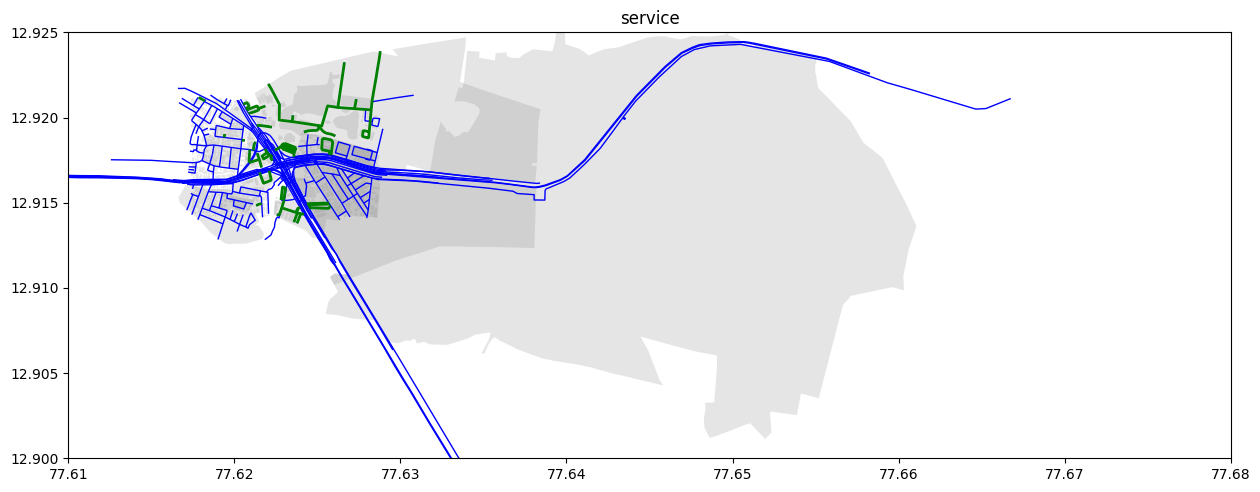

In [172]:
area=gpd.read_file('map.osm',layer='multipolygons')
fig,ax=plt.subplots(figsize=(15,15))
roads.plot(ax=ax,linewidth=1,color='blue')
service.plot(ax=ax,color='green',linewidth=2,label='service')
area.plot(ax=ax,color='grey',alpha=0.2)
ax.set_xlim([77.61, 77.68]) 
ax.set_ylim([12.90, 12.925]) 
plt.title('service')
plt.show()